In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
df = pd.read_csv("Salary_dataset.csv")
df = df.drop(columns=[df.columns[0]])
print(df)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


In [6]:
X = df["YearsExperience"].to_numpy()
Y = df["Salary"].to_numpy()

# Chia dữ liệu thành 70% train và 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"Data train: {X_train}")
print(f"Data test:  {X_test}")

Data train: [ 1.2  2.3  5.2  3.   4.2  4.1  8.   1.4  1.6  9.1  2.1  7.2  9.6  6.
 10.6  6.9  3.3  4.   4.6  6.1  3.1]
Data test:  [ 9.7  5.   8.3  5.4  3.3  3.8 10.4  8.8  4.1]


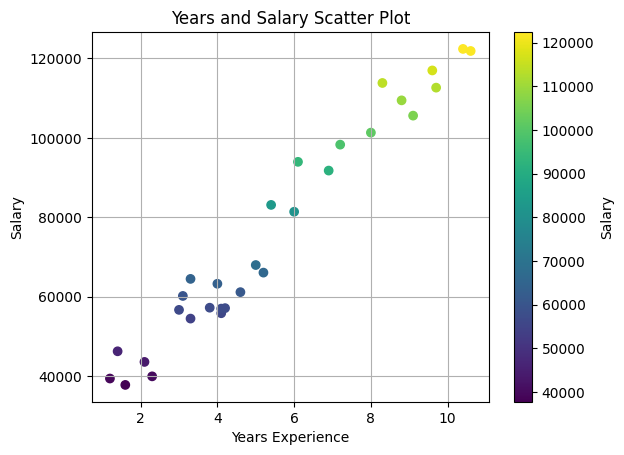

In [7]:
plt.scatter(X,Y, c=Y, cmap='viridis')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Years and Salary Scatter Plot")
plt.colorbar(label='Salary')
plt.grid(True)

**Cài đặt thủ công**

chọn w,b ban đầu

In [8]:
w_manual = np.random.randn()
b_manual = np.random.randn()
alpha = 0.0001 #tốc độ học
print(f'random initial w = {w_manual}\nrandom initial b = {b_manual}')

random initial w = 0.20281065786310887
random initial b = 0.5900014312575059


tính f(w,b) = wx + b

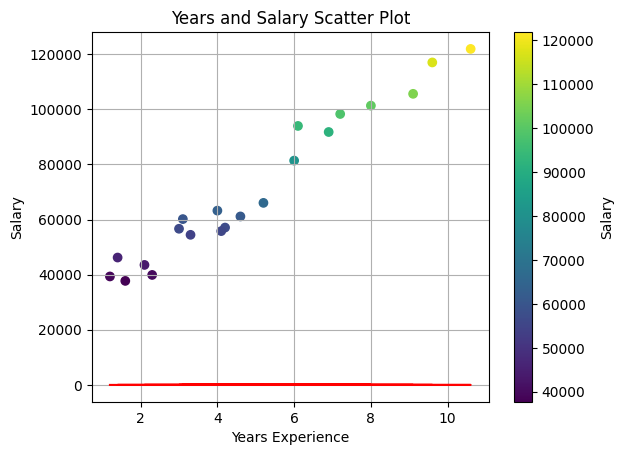

In [9]:
def line(w, b, x_values):
    y_values = []
    for x_value in x_values:
        y_value = w * x_value + b
        y_values.append(y_value)
    return y_values

init_salary_guess = line(w_manual, b_manual, X_train)

plt.scatter(X_train,y_train, c=y_train, cmap='viridis')
plt.plot(X_train, init_salary_guess, color = "red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Years and Salary Scatter Plot")
plt.colorbar(label='Salary')
plt.grid(True)

hàm tổn thất

In [10]:
def cost(w, b, x, y):
    m = len(x)
    _cost = 0

    for i, x_value in enumerate(x):
        y_value = y[i]
        y_guess = w * x_value + b
        _cost += (y_guess - y_value)**2
    return (_cost / (2*m))

print(cost(w_manual, b_manual, X_train, y_train))

2864399041.000556


Đạo hàm J(w,b) => w, b

In [11]:
def derivatives(w, b, x, y):
    m = len(x)
    der_w = 0
    der_b = 0

    for i, x_value in enumerate(x):
        y_value = y[i]
        der_w += (w * x_value + b - y_value) * x_value
        der_b += (w * x_value + b - y_value)
    
    return der_w/m, der_b/m

Tìm w, b tối ưu

In [12]:
def Gradient_descent( w,b, alpha, x, y, epoch = 100000):
    count = 1
    while True:
        der_w, der_b = derivatives(w, b, x, y)
        w = w - alpha * der_w
        b = b - alpha * der_b
        _cost = cost(w, b, x, y)
        print(f'Iteration # {count}, cost = {_cost}')

        if _cost < 1000000 or count == epoch:
            print(f'Breaking the loop. Cost = {_cost}, step = {count}\n\nw = {w}\nb = {b}')
            return w, b
        count+=1

In [13]:
w_manual_final , b_manual_final = Gradient_descent(w_manual,b_manual,alpha, X_train,y_train,2000)

Iteration # 1, cost = 2846263934.2478538
Iteration # 2, cost = 2828246752.1175637
Iteration # 3, cost = 2810346727.6794953
Iteration # 4, cost = 2792563098.991239
Iteration # 5, cost = 2774895109.0657353
Iteration # 6, cost = 2757342005.8390374
Iteration # 7, cost = 2739903042.138304
Iteration # 8, cost = 2722577475.6499815
Iteration # 9, cost = 2705364568.8882065
Iteration # 10, cost = 2688263589.1634035
Iteration # 11, cost = 2671273808.551099
Iteration # 12, cost = 2654394503.860923
Iteration # 13, cost = 2637624956.605828
Iteration # 14, cost = 2620964452.9714932
Iteration # 15, cost = 2604412283.7859454
Iteration # 16, cost = 2587967744.4893546
Iteration # 17, cost = 2571630135.1040487
Iteration # 18, cost = 2555398760.204707
Iteration # 19, cost = 2539272928.888758
Iteration # 20, cost = 2523251954.746963
Iteration # 21, cost = 2507335155.834192
Iteration # 22, cost = 2491521854.640395
Iteration # 23, cost = 2475811378.0617537
Iteration # 24, cost = 2460203057.3720307
Iteration #

[np.float64(18343.768424650472), np.float64(32366.50034922943), np.float64(69335.52087766487), np.float64(41290.05702850695), np.float64(56587.58276441126), np.float64(55312.7889530859), np.float64(105029.74759477495), np.float64(20893.356047301186), np.float64(23442.94366995191), np.float64(119052.4795193539), np.float64(29816.91272657871), np.float64(94831.39710417207), np.float64(125426.4485759807), np.float64(79533.87136826775), np.float64(138174.3866892343), np.float64(91007.015670196), np.float64(45114.438462483035), np.float64(54037.99514176055), np.float64(61686.75800971271), np.float64(80808.66517959311), np.float64(42564.85083983231)]


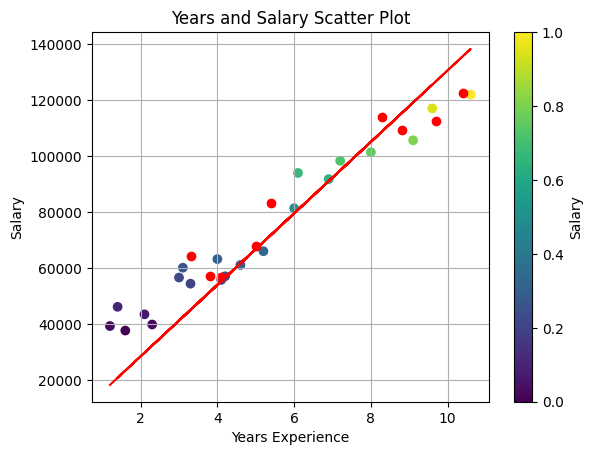

In [14]:
ml_salary = []
for year in X_train:
    ml_salary.append(w_manual_final * year + b_manual_final)

print(ml_salary)

plt.scatter(X_train,y_train, c=y_train, cmap='viridis')
plt.scatter(X_test,y_test, color = "red")
plt.plot(X_train, ml_salary, color = "red")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Years and Salary Scatter Plot")
plt.colorbar(label='Salary')
plt.grid(True)

**Dùng Tensorflow**

Xây dựng mô hình Linear Regression

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=1)  
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train

In [63]:
model.fit(X_train, y_train, epochs=2000, verbose=1)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 5729221632.0000
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5729220608.0000
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5729219584.0000
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5729218560.0000
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5729217024.0000
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5729217024.0000
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5729215488.0000
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5729214976.0000
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5729213440.0000
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 5729212928.0000
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 5729211904.0000
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 5729210880.0000
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5729209344.0000
Epoch 14/2000
1/1 ━━━